## Examen 
### Introducción a la Ciencia de Datos y el Machine Learning

---- 

**Intrucciones:** 

----

Acceda a la página del Instituto Nacional de Infromática del Perú (INEI) y diríjase a la sección de Microdatos https://proyectos.inei.gob.pe/microdatos/ , seleccionando:

- Encuesta Nacional de Hogares (ENAHO), metodología actualizada
- Condiciones de Vida y Pobreza - ENAHO
- Año: 2022
- Periodo: Trimestre 4

Descargue el módulo 5, Empleo e Ingresos en su versión .csv, descomprima el archivo descargado y suba a su Drive el archivo "Enaho01a-2022-500.csv". Luego, haga lo mismo con el módulo Gastos en Alimentos y Bebidas (Módulo 601) y cargue el archivo .csv correspondiente. 

----

1) Lea el diccionario inserto en el archivo .zip que ha descargado y determine cuáles son las variables con las que podría cruzar sus bases usando un Left Join. Justifique su respuesta en una celda de texto del Notebook de Google Colab. (2ptos)

Nota: sí, se debe usar más de una variable de cruce y ninguna IA actual te podrá dar la respuesta &#x1F600;.  

2) Cruce las bases usando las variables que determinó en la pregunta 1) y determine el número de filas y columnas con las que termina la tabla final. (4ptos)

3) Cree una variable mensualizada del ingreso. Para ello, deberá identificar en la base de datos las variables P523 y P524A1 descritas en el diccionario. Usando la variable creada calcule la media, mediana, primer cuartil, tercer cuartil, mínimo, máximo y el número de datos con los que se han calculado dichos estadísticos.     (4 ptos)

Haga un subset de la base datos, quédese con todas aquellas filas que tengan datos no missing para la variable mensualizada en la pregunta 3).

5) Haga un histograma de la variable ingreso mensualizado. Muestre en el gráfico el valor de la mediana. (5ptos)

6) Elija una variable continua del módulo "Gastos en Alimentos y Bebidas", cree un gráfico de dispersión entre ella y la variable  ingreso mensualizado. Ayuda: Para que ambas variables estén en la misma escala aplique la transformación logaritmo natural. (5ptos)




#Solución:

In [1]:
# Importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Segun las indicaciones, las bases se tiene que subir al google drive y apartir de ahi llamarlas,
# estos codigos solicitan acceso a los archivos de tu google drive.
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Importamos las bases*

In [8]:
# Modulo 7 (601): Gasto en alimentos y bebidas}
df_mod601=pd.read_csv('/content/gdrive/MyDrive/base_enaho/Enaho01-2022-601.csv',  sep=',' , encoding='latin-1') 

# Pasamos el nombre de todas las variables a minuscula para evitar posibles errores
df_mod601.columns= df_mod601.columns.str.lower()  

# Modulo 5: Empleo e ingresos
df_mod5=pd.read_csv('/content/gdrive/MyDrive/base_enaho/Enaho01a-2022-500.csv', sep=',' , encoding='latin-1') 

# Pasamos el nombre de todas las variables a minuscula para evitar posibles errores
df_mod5.columns= df_mod5.columns.str.lower() 


<ipython-input-8-3bf09b70d51f>:10: DtypeWarning: Columns (221,226,231,239,244,249,254,259,264,269,274,279,284,289,294,299,304,309,314,319,324,329,334,339,346,349,352,355,358,361,364,367,372,374,376,378,380,382,384,386,388,392,393,394,395,396,400,491,492,493,494,941,942,943,944,945,946,947,948,949,950,1021,1024,1029) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mod5=pd.read_csv('/content/gdrive/MyDrive/base_enaho/Enaho01a-2022-500.csv', sep=',' , encoding='latin-1')


**1) Lea el diccionario inserto en el archivo .zip que ha descargado y determine cuáles son las variables con las que podría cruzar sus bases usando un Left Join. Justifique su respuesta en una celda de texto del Notebook de Google Colab. (2ptos)**

**Nota: sí, se debe usar más de una variable de cruce y ninguna IA actual te podrá dar la respuesta 😀.**

Respuesta:
Al analizar el diccionario y las bases de datos correspondientes al módulo 5 y al módulo 7 (601), se puede observar que el primero está desagregado a nivel de personas, mientras que el segundo se encuentra desagregado a nivel de hogares. Dado que cada individuo pertenece a un hogar, es necesario utilizar las variables comunes entre ambas bases, como el **"año", "mes", "conglome", "vivienda" y "hogar"**, para fusionarlas y así establecer una conexión entre los individuos y las características de sus hogares correspondientes, que se encuentran registradas en el módulo 7 (601). De esta forma, al momento de hacer el merge, se obtiene información correspondiente a empleo e ingresos de cada individuo con los Gastos de su hogar registradas en el módulo 7.

**2) Cruce las bases usando las variables que determinó en la pregunta 1) y determine el número de filas y columnas con las que termina la tabla final. (4ptos)**

*Nota: Antes de hacer el merge entre las bases de datos, es relevante recordar que el módulo 7 (601) está desglosado a nivel de artículos específicos de alimentos y bebidas por cada hogar. Sin embargo, como nuestro objetivo es hacer el merge entre la base de datos del módulo 5 (nivel de personas) con el módulo 7 (601), necesitamos agregar la información del modulo 7. De esta forma, sumamos las observaciones por cada hogar y asi calculamos el gasto total en alimentos y bebidas en los últimos 15 días (Variable p601c). De esta forma,podemos unir los datos del módulo 7 (601) agregados a nivel de hogares con los datos del módulo 5 que se encuentra a nivel de personas.*

In [53]:
# Agregamos la variable "p601c" observaciones a nivel de hogar
c_df_mod601 = df_mod601.groupby(['año','mes', 'conglome', 'vivienda' , 'hogar'])[['p601c']].agg(['sum'])

In [54]:
df_merge = df_mod5.merge(c_df_mod601, 
                         left_on=['año',"mes", "conglome", "vivienda","hogar"], 
                         right_on=['año',"mes", "conglome", "vivienda","hogar"],
                         how="left", validate="m:1")

<ipython-input-54-225619d9f1f5>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_merge = df_mod5.merge(c_df_mod601,


**1) y determine el número de filas y columnas con las que termina la tabla final.**

In [55]:
# Obtenemos el número de filas y columnas
filas = len(df_merge.axes[0])
columnas = len(df_merge.axes[1])
  
# Print the number of rows and columns
print("Número de filas: " + str(filas))

print("Número de columnas:" + str(columnas))


Número de filas: 21606
Número de columnas:1186


**3) Cree una variable mensualizada del ingreso. Para ello, deberá identificar en la base de datos las variables P523 y P524A1 descritas en el diccionario. Usando la variable creada calcule la media, mediana, primer cuartil, tercer cuartil, mínimo, máximo y el número de datos con los que se han calculado dichos estadísticos. (4 ptos)**



*Antes de continuar con el análisis, examinamos la variable "P523":*



> *p523) en su ocupacion principal, a ud. le pagan:?*


> 1 = diario

> 2 = semanal

> 3 = quincenal

> 4 = mensual


In [56]:
df_merge['p523'].value_counts()

     15186
4     3981
2     1932
3      425
1       82
Name: p523, dtype: int64

*Antes de crear la variable de ingreso mensual, es recomendable convertir la variable de ingreso (p524a1) a tipo float y corregir missings de esta manera, se evita posibles errores en el futuro y asegurarnos de que los cálculos sean precisos.*


In [57]:
df_merge.loc[df_merge['p524a1']==" ", 'p524a1'] = None
df_merge.loc[df_merge['p524a1']=="999999", 'p524a1'] = None
df_merge['p524a1'] = df_merge['p524a1'].astype(float)

In [58]:
# Creamos nuestra variable de ingreso mensual
df_merge.loc[df_merge['p523']=="1", 'ingreso_mensual'] = df_merge['p524a1']*30  # Diario 
df_merge.loc[df_merge["p523"]=="2", 'ingreso_mensual'] = df_merge['p524a1']*4   # Semanal
df_merge.loc[df_merge["p523"]=="3", 'ingreso_mensual'] = df_merge['p524a1']*2   # Quincenal
df_merge.loc[df_merge["p523"]=="4", 'ingreso_mensual'] = df_merge['p524a1']     # Mensual
df_merge.loc[df_merge["p524a2"]=="1", 'ingreso_mensual'] = None                 # No sabe, le ponemos missing

**Usando la variable creada calcule la media, mediana, primer cuartil, tercer cuartil, mínimo, máximo y el número de datos con los que se han calculado dichos estadísticos.**

In [59]:
# Primer cuartil
def q25(x):
  return x.quantile(0.25)
# Tercer cuartil
def q75(x):
  return x.quantile(0.75)

# Estadisticos
df_merge['ingreso_mensual'].agg(Media=('mean'), Mediana=('median'), Primer_cuartil=(q25) , Tercer_cuartil=(q75) ,
                                Mínimo=('min'), Máximo=('max'), Número_de_datos=('count'))

Media               1501.081833
Mediana             1200.000000
Primer_cuartil       720.000000
Tercer_cuartil      1900.000000
Mínimo                10.000000
Máximo             18000.000000
Número_de_datos     6330.000000
Name: ingreso_mensual, dtype: float64

**4) Haga un subset de la base datos, quédese con todas aquellas filas que tengan datos no missing para la variable mensualizada en la pregunta 3).**

In [60]:
df_merge_subset = df_merge[~df_merge['ingreso_mensual'].isna()]
df_merge_subset.shape

(6330, 1187)

**5) Haga un histograma de la variable ingreso mensualizado. Muestre en el gráfico el valor de la mediana. (5ptos)**

Text(1320.0, 1557.3600000000001, 'Mediana: 1200')

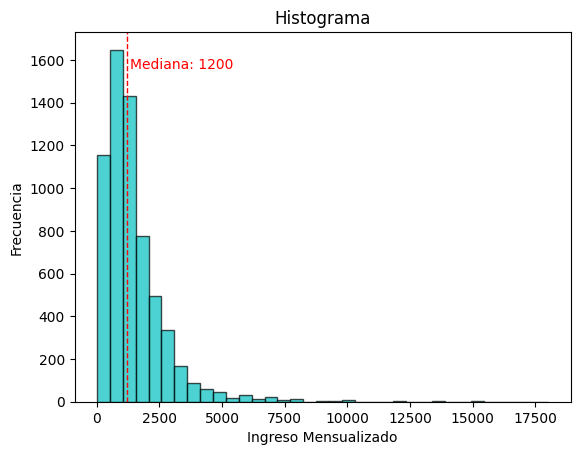

In [61]:
valor= df_merge_subset['ingreso_mensual']

plt.hist( valor, bins=35, color='c', edgecolor='k', alpha=0.7)
plt.xlabel('Ingreso Mensualizado')
plt.ylabel('Frecuencia')
plt.title(r'Histograma')

plt.axvline(valor.median(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(valor.median()*1.1, max_ylim*0.9, 'Mediana: {:.0f}'.format(valor.median()), color="red")


**6) Elija una variable continua del módulo "Gastos en Alimentos y Bebidas", cree un gráfico de dispersión entre ella y la variable ingreso mensualizado. Ayuda: Para que ambas variables estén en la misma escala aplique la transformación logaritmo natural. (5ptos)**

*Aplicamos logartimos naturales*

In [62]:
# Logaritmos
ln_ingreso_mensual = np.log(df_merge_subset['ingreso_mensual'])
ln_p601c = np.log(df_merge_subset[('p601c', 'sum')])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*Graficamos*

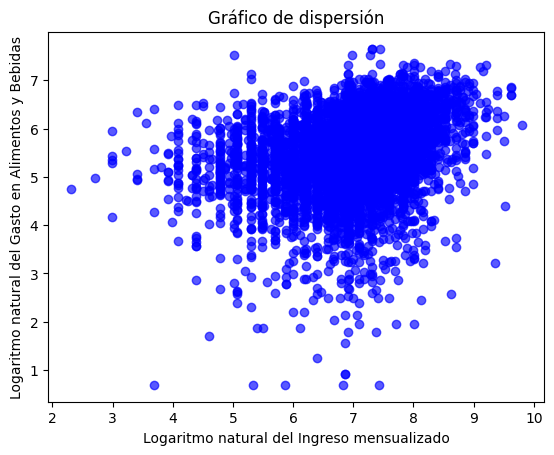

In [63]:
plt.scatter(ln_ingreso_mensual, ln_p601c, color='blue', alpha=0.65)
plt.title("Gráfico de dispersión")
plt.xlabel("Logaritmo natural del Ingreso mensualizado")
plt.ylabel("Logaritmo natural del Gasto en Alimentos y Bebidas")
plt.show()